                              
# Projet 3--  Machine Learning 

# Chaima HT 


### Objectif 
L'objectif de ce projet  est d'appliquer les méthodes  de  régression linéaire er régression logistique en machine Learning

Dans cette première cellule, vous allez charger les bibliothèques nécessaires.


In [1]:
import numpy as np
import numpy.linalg as nlp
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.datasets import fetch_california_housing 
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer  

from sklearn.model_selection import train_test_split
import seaborn as sns


# Régression linéaire:

#### <span style="color:rgb(4,139,154)">Question 1 : </span>
Quel jeu de donnée parmi les deux importés faut il utiliser pour la régression linéaire?

In [2]:
# A completer

Data = load_boston()

In [3]:
Data.DESCR.split("\n") #description donnée

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [4]:
#Transformation de notre  de données en tableaux des données (Data Frame) grace à pandas
df = pd.DataFrame(Data.data, columns=Data.feature_names)
#on affiche les 5 premières lignes
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

#### <span style="color:rgb(4,139,154)">Question 2 : </span>

Ajouter une colonne pour le prix

In [6]:
df['prix'] = Data.target
print(df['prix'])


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: prix, Length: 506, dtype: float64


In [7]:
#o
df.info()
df.tail(5)# 5 dernières lignes
df.columns# les noms des colonnes 
print(df.columns.values) #le nom des colonnes sous forme d'array numpy.
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  prix     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'prix']


(506, 14)

<AxesSubplot:>

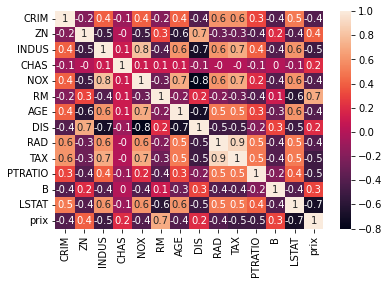

In [8]:
#etude de la correlation: Matrice de corrélation
import seaborn as sns 
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

Le prix est corrélé  le plus à quelle caractéristique ? 
Le prix le plus corrélé est la caractéristique RM.


Creer X une matrice de caractéristiques et y le vecteur des prix

Une matrice de caratéristiques(features )  $X$ et un vecteur $y$ représentant le prix de logement de ces échantillons(target). 


In [9]:
#X=boston.data
X=df.drop(columns=['prix'])

y=df['prix']#df.


In [10]:
### Remplacer le point d'interrogation par la valeur approprie 
#  Nombre  total d'observations  ?
n =506

# Nombre de caractéristiques  par observations
d= 13

print("nombre total d'observations (apprentissage + test): %d" % n)

print("nombre de caractéristiques par observation: %d" % d)


nombre total d'observations (apprentissage + test): 506
nombre de caractéristiques par observation: 13


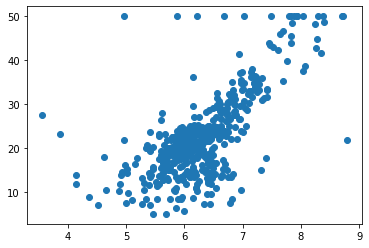

In [11]:
#Représenter le nuage de points de prix en fonction de la variable 'RM' 
plt.scatter(df['RM'], y);

# Diviser les données 
Diviser les données en données d'entraînement et de données de test. Les données de formation sont les données dont le modèle tirera des enseignements. Les données de test sont les données que vous allez utiliser pour voir si le modèle fonctionne bien sur des données inédites.

Scikit-learn a une fonction que vous  pouvez utiliser, appelée «train_test_split», qui facilite la division de notre jeu de données en données de d'entrainement et de test.

 Mettre 'test_size' à 0.2,  signifie que 20% de toutes les données seront utilisées pour les tests, ce qui laisse 80% des données en tant que données de formation pour le modèle. Choisir 'random_state' sur 1, pour obtenir le même partage à chaque fois afin de pouvoir  reproduire les résultats.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state=1)


# Etude Mathématique
Nous avons  utilisé une régression linéaire à deux variables (+biais) pour calculer le vecteur de prédiction

$Y_{pred}=w_0 X_{biais}+w_1X_{\text{feature}_1}+w_2X_{\text{feature}_2}+...+w_dX_{\text{feature}_d}$  par la résolution le problème de regression linéaire
$$\min_{w\in \mathbb{R}^{d+1}}\frac{1}{2}\|w_0 X_{biais}+w_1X_{\text{feature}_1}+w_2X_{\text{feature}_2}+...+w_dX_{\text{feature}_d}-y\|_2^2=
\min_{w\in \mathbb{R}^{d+1}}\frac{1}{n}\|\tilde X w-y\|_2^2 \quad  (1),$$
pour $\tilde X=[X_{biais}, X]$ la matrice dont les colonnes sont dans l'ordre $X_{biais}$, et les colonnes de la matrices $X$ eprésentant les vecteurs caractiristiques. 
$X_{biais}$ est le vecteur dont toutes ses compoasantes valent 1.
#### <span style="color:rgb(4,139,154)">Question 3 : </span>
Que vérifie toute solution $w$ de pb (1) ?
La solution exacte est $w$ solution de l'équation normale  $\tilde X^T\tilde Xw=\tilde X^TY$, où $\tilde X^T$ désigne la transposée de $\tilde X$

On cheche à calculer une solution exacte pour une régression sur le training set pour déterminer le modèle puis l'évaluer sur l'ensemble test.
Pour entainer et tester le  modèle on utilise 'LinearRegression' de 
 scikit-learn’

In [13]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()



In [14]:
model.fit(X_train,y_train)

LinearRegression()

Evaluatuion du modèle utilisant  RMSE et R2-score.
$$R_2=1-\frac{\sum_{i=1}^n(y_{pred}^i-y^i)^2}{\displaystyle\sum_{i=1}^n(y^i-\bar y)^2},$$
$\bar y=\frac{1}{s}\displaystyle\sum_{i=1}^ny_i$.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
y_predicted=model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 23.380836480270023
le score R2 est 0.7634174432138492




In [17]:
# vérifier l'exactitude de notre modèle sur les données train puis  test
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7293585058196337
0.7634174432138492


In [18]:

#Une fois le modèle formé,
#calcuer le résultat (prédiction) de modèle sur l'ensemble  test
y_pred=model.predict(X_test)

#### <span style="color:rgb(4,139,154)">Question 4 : </span>

Tester une régression polynomiale ou avec régularisation ridge

### Régression polynomiale

In [19]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

poly_reg = PolynomialFeatures(degree = 3) # Choisir le degre de poly
X_poly = poly_reg.fit_transform(X) # tranformer les données pou une régression linéaire
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=1)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


1.0
-1112.997619470396


In [20]:
ypred=model.predict(X_train)

In [21]:
for k in range(1,4):
    poly_reg = PolynomialFeatures(degree = k)
    X_poly = poly_reg.fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=1)
    model.fit(X_train,y_train)
    print(k,model.score(X_train,y_train),model.score(X_test,y_test))
# meuilleur k est égale à k=2 


1 0.7293585058196337 0.7634174432138479
2 0.8304936051238159 0.7986703650943683
3 1.0 -1112.997619470396


###  Régression ridge 

In [22]:
from sklearn import datasets, linear_model, metrics 

#from sklearn.kernel_ridge import KernelRidge

from sklearn.model_selection import GridSearchCV



In [23]:
model= linear_model.Ridge(alpha=0.1)


In [24]:
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))



0.9805945102862997
0.08536027304452665


C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


#### <span style="color:rgb(4,139,154)">Question 5 : </span>

Utiliser grid search pour déterminer le meilleur terme de régularisation $\alpha$

In [25]:
param_grid = {'alpha': [0.01, 0.1,1.5,2]}



grid = GridSearchCV(model, param_grid, cv=10)#, scoring='neg_mean_squared_error')


grid.fit(X_train,y_train)
print(grid.best_params)


C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\l

C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

# Question Bonus 

Retrouver le score $r_2$ pour l'ensemble train et ensemble test en utilisant la solution analytique

In [ ]:
X = Data.data
y = Data.target


In [ ]:
b = np.ones(X.shape[0])
b.shape

In [26]:
# X ~ correspond à la matrice ou la premiére colonne est égale à 1 et le reste est X
X1 = np.c_[np.ones(X.shape[0]),X]
X1

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [27]:
c = np.transpose(X1)*y
c

ValueError: Length of values (14) does not match length of index (506)

In [28]:
# Calcul de Z train
Z_train = np.c_[np.ones(X_train.shape[0]),X_train]
Z_train

array([[1.00000000e+00, 1.00000000e+00, 1.41500000e-01, ...,
        8.53910556e+05, 1.29410761e+04, 1.96122941e+02],
       [1.00000000e+00, 1.00000000e+00, 1.54450000e-01, ...,
        1.04704772e+06, 1.83852445e+04, 3.22828856e+02],
       [1.00000000e+00, 1.00000000e+00, 1.68118000e+01, ...,
        4.85348728e+06, 3.76759746e+05, 2.92465804e+04],
       ...,
       [1.00000000e+00, 1.00000000e+00, 5.87205000e+00, ...,
        3.05134855e+06, 1.48915650e+05, 7.26756395e+03],
       [1.00000000e+00, 1.00000000e+00, 3.30450000e-01, ...,
        1.54431332e+06, 4.45975552e+04, 1.28791347e+03],
       [1.00000000e+00, 1.00000000e+00, 8.01400000e-02, ...,
        1.38153468e+06, 3.05267300e+04, 6.74526133e+02]])

In [29]:
# Calcul de Z test
Z_test = np.c_[np.ones(X_test.shape[0]),X_test]
Z_test

array([[1.00000000e+00, 1.00000000e+00, 4.93200000e-02, ...,
        1.18619796e+06, 2.25045872e+04, 4.26957777e+02],
       [1.00000000e+00, 1.00000000e+00, 2.54300000e-02, ...,
        1.13106260e+06, 2.04611476e+04, 3.70146232e+02],
       [1.00000000e+00, 1.00000000e+00, 2.29270000e-01, ...,
        2.89980050e+06, 1.38810026e+05, 6.64467200e+03],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.07930000e-01, ...,
        2.01284694e+06, 6.64998100e+04, 2.19700000e+03],
       [1.00000000e+00, 1.00000000e+00, 1.22472000e+01, ...,
        9.53359702e+03, 6.06824086e+03, 3.86250301e+03],
       [1.00000000e+00, 1.00000000e+00, 9.96654000e+00, ...,
        2.81920775e+06, 1.37413870e+05, 6.69782913e+03]])

In [30]:
q = 0.2 # lambda = 0.2

r2 = r2_score(y_test,ypredict)
r2

NameError: name 'ypredict' is not defined

#  Régression logistique
    Refaire le même tavail pour une régression logistique 


# Jeu de donnée
Charger la  base de données impotée pour classification,
très réputées dans la branche de classification, du
cancer du sein :  Wisconsin Diagnostic Breast Cancer (WDBC)


In [31]:
Dataset = load_breast_cancer()


In [32]:
#Quels sont les variables des jeux de données ?
Dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [33]:
Dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
#Transformation de notre  de données en tableaux des données (Data Frame) grace à pandas
df = pd.DataFrame(Dataset.data, columns=Dataset.feature_names)
#on affiche les 5 premières lignes
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df.shape

(569, 30)

In [36]:
df.info()
df.tail(5)# 5 dernières lignes
df.columns# les noms des colonnes 
print(df.columns.values) #le nom des colonnes sous forme d'array numpy.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [37]:
### Remplacer le point d'interrogation par la valeur approprie 
X= Dataset.data
y= Dataset.target

#  Nombre  totla d'observations  ?
n =569

# Nombre de caractéristiques  par observations
d= 30

print("nombre total d'observations (apprentissage + test): %d" % n)

print("nombre de caractéristiques par observation: %d" % d)



nombre total d'observations (apprentissage + test): 569
nombre de caractéristiques par observation: 30


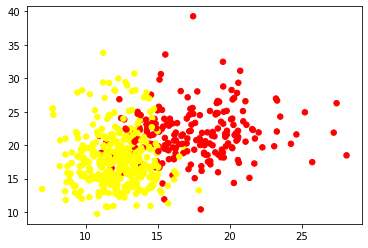

In [38]:
#Représenter la première et la deuxième caractéristiques de deux classes
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='autumn');

 
Diviser les données en données d'entraînement et de données de test. Les données 
 Choisir  'test_size' à 0.2

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [40]:
#importer le modèle regression logistique
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()



In [41]:
# Appliquer le modèle
logreg.fit(X_train, y_train)


C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
#Calculer le score sur les deux ensembles train et test
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9538461538461539
0.9473684210526315
